# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice.
number_mice = merge_df["Mouse ID"].unique()
mice_count = len(number_mice)
mice_count

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df.loc[merge_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
target_mouse_id = 'g989'
mouse_data = merge_df.loc[merge_df['Mouse ID'] == target_mouse_id]
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
excluded_mouse_id = 'g989'
no_dup_df = merge_df[merge_df['Mouse ID'] != excluded_mouse_id]
no_dup_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice = no_dup_df["Mouse ID"].unique()
mice_count = len(number_mice)
mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_df = no_dup_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_mean = statistics_df.mean()
drug_median = statistics_df.median()
drug_variance = statistics_df.var()
drug_std = statistics_df.std()
drug_sem = statistics_df.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_df = pd.DataFrame ({
    "Mean Tumor Volume" : drug_mean,
    "Median Tumor Volume": drug_median,
    "Tumor Volume Variance":drug_variance,
    "Tumor Volume Std. Dev.":drug_std,
    "Tumor Volume Std. Err.":drug_sem})
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = statistics_df.agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

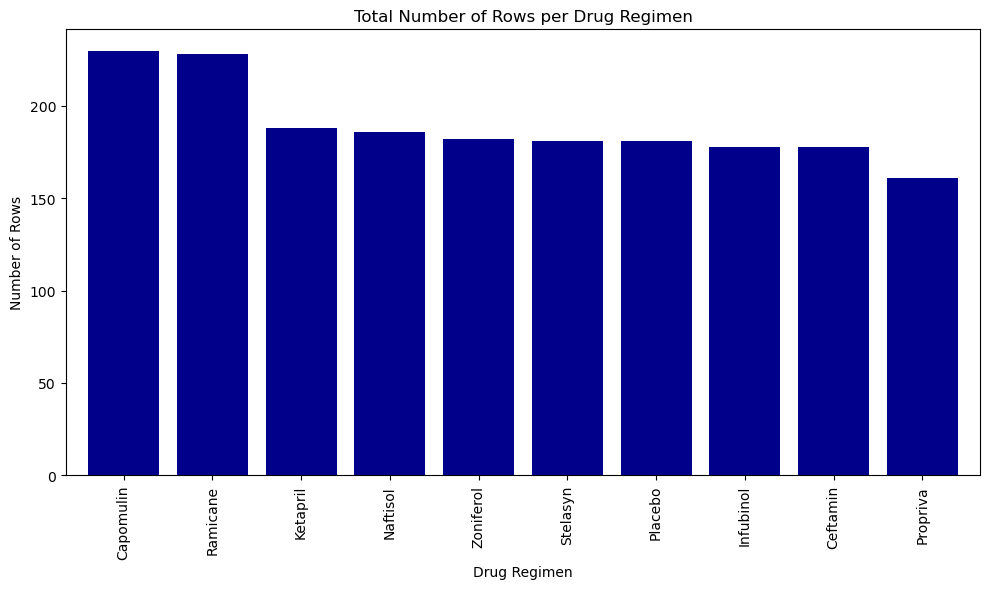

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#reorganized the order of the drugs because it wasn't looking like the startee code on the x-axis
desired_order = [
    'Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 
    'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 
    'Ceftamin', 'Propriva']

merge_df['Drug Regimen'] = pd.Categorical(merge_df['Drug Regimen'], categories=desired_order, ordered=True)
drug_count = merge_df.groupby('Drug Regimen').size()
ax = drug_count.plot(kind='bar', figsize=(10, 6), color='darkblue', width=.8)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')
plt.tight_layout()
plt.show()



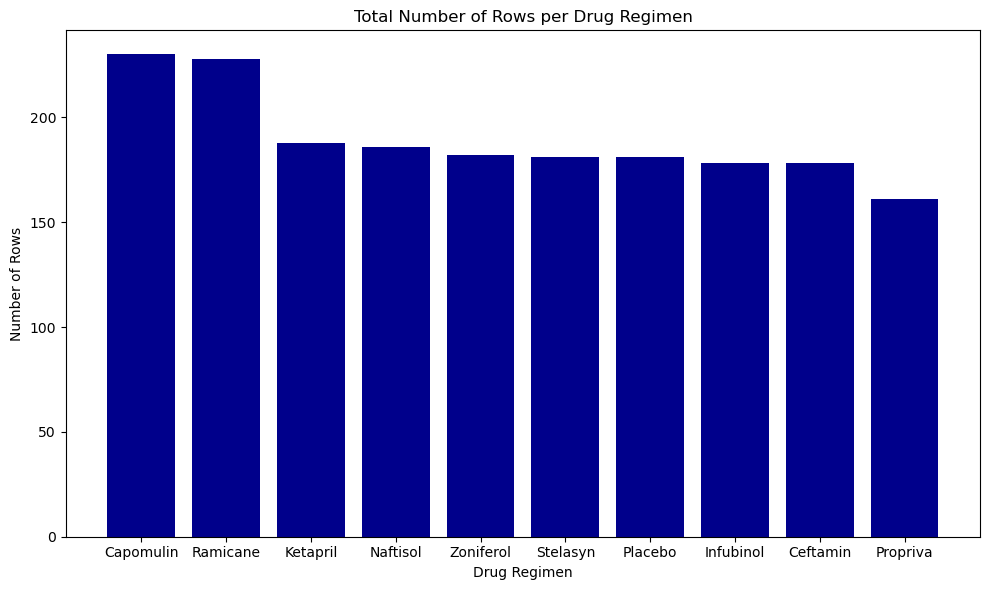

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_count = merge_df.groupby('Drug Regimen').size()

#order for drugs
desired_order = [
    'Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 
    'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 
    'Ceftamin', 'Propriva']

plt.figure(figsize=(10, 6))
plt.bar(desired_order, drug_count, color='darkblue', width=.8)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows per Drug Regimen')

plt.tight_layout()
plt.show()


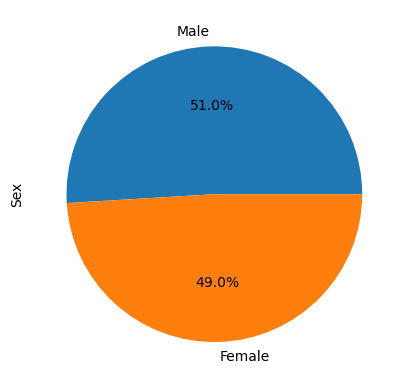

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = no_dup_df['Sex'].value_counts()

gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

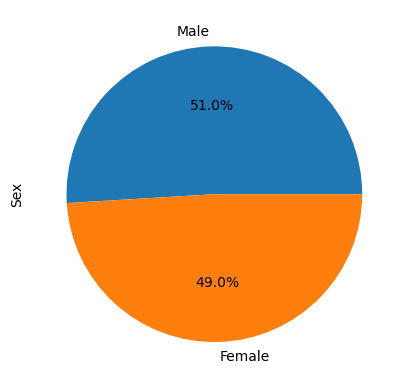

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = []
for count in gender_count:
    counts.append(count)

plt.ylabel('Sex')
plt.pie(counts, labels=labels, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = no_dup_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_max_df = pd.merge(max_timepoint,no_dup_df, on=["Mouse ID", "Timepoint"], how="inner")
merge_max_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merge_max_df.loc[merge_max_df['Drug Regimen']== treatment]['Tumor Volume (mm3)']
    
    # add subset
    tumor_volume_data.append(tumor_volume)
    
    
    quartiles = tumor_volume.quantile([0.25,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #locate potential outliers but only worry about the upper bound
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


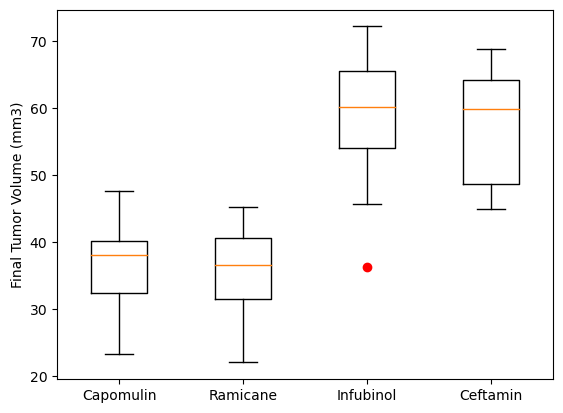

In [49]:
plt.boxplot(tumor_volume_data, labels=treatments, sym= 'ro')

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

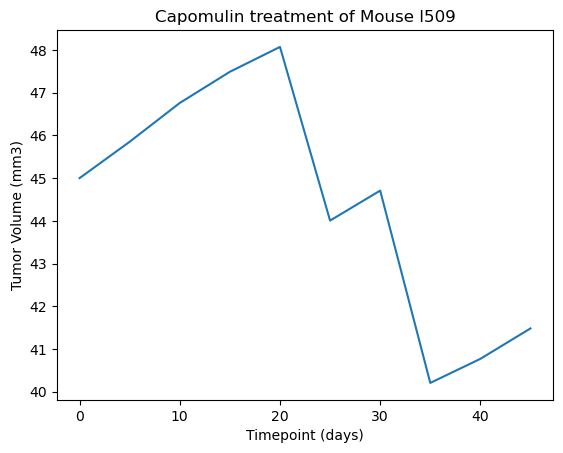

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_l509 = no_dup_df[(no_dup_df["Drug Regimen"] == "Capomulin") & (no_dup_df["Mouse ID"] == "l509")]

plt.plot(capomulin_l509["Timepoint"], capomulin_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse l509")
plt.show()

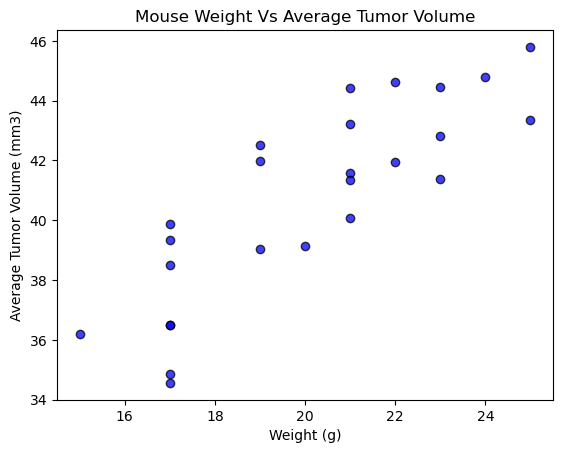

In [53]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = no_dup_df[no_dup_df["Drug Regimen"] == "Capomulin"]

# Create the scatter plot with average tumor volume vs. weight
plt.scatter(
    capomulin.groupby("Mouse ID")["Weight (g)"].mean(),
    capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean(),
    marker="o", facecolors='b', edgecolors="black", alpha=0.75)

plt.title("Mouse Weight Vs Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


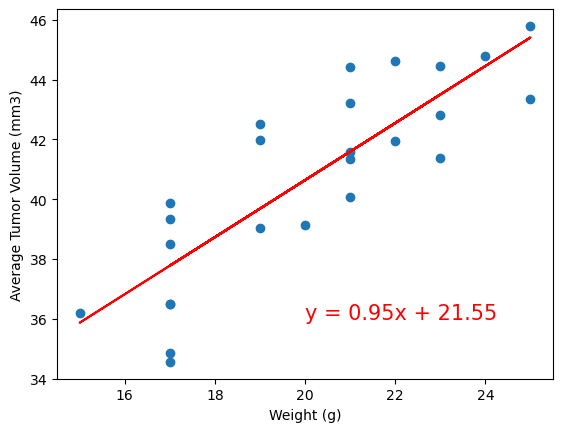

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin = no_dup_df[no_dup_df["Drug Regimen"] == "Capomulin"]

avg_tumor_volume = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_weight = capomulin.groupby("Mouse ID")["Weight (g)"].mean()

correlation = np.corrcoef(avg_weight, avg_tumor_volume)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")
#linreg
slope, intercept, _, _, _ = linregress(avg_weight, avg_tumor_volume)
plt.scatter(avg_weight, avg_tumor_volume)
plt.plot(avg_weight, slope * avg_weight + intercept, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (20, 36), fontsize=15, color="red")

plt.show()
